<a href="https://colab.research.google.com/github/fjadidi2001/DecompDenoise/blob/main/DD_Feb12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries for image processing and noise reduction  


In [2]:
import os
import cv2
import numpy as np
from skimage.util import random_noise
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from scipy.linalg import svd

# Step 2: Synthetic Data Generation


In [3]:
def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise to an image."""
    noisy = image + np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    return np.clip(noisy, 0, 255)

def add_salt_pepper_noise(image, prob=0.05):
    """Add salt-and-pepper noise to an image."""
    return (random_noise(image, mode='s&p', amount=prob) * 255).astype(np.uint8)

def add_poisson_noise(image):
    """Add Poisson noise to an image."""
    return (random_noise(image, mode='poisson') * 255).astype(np.uint8)

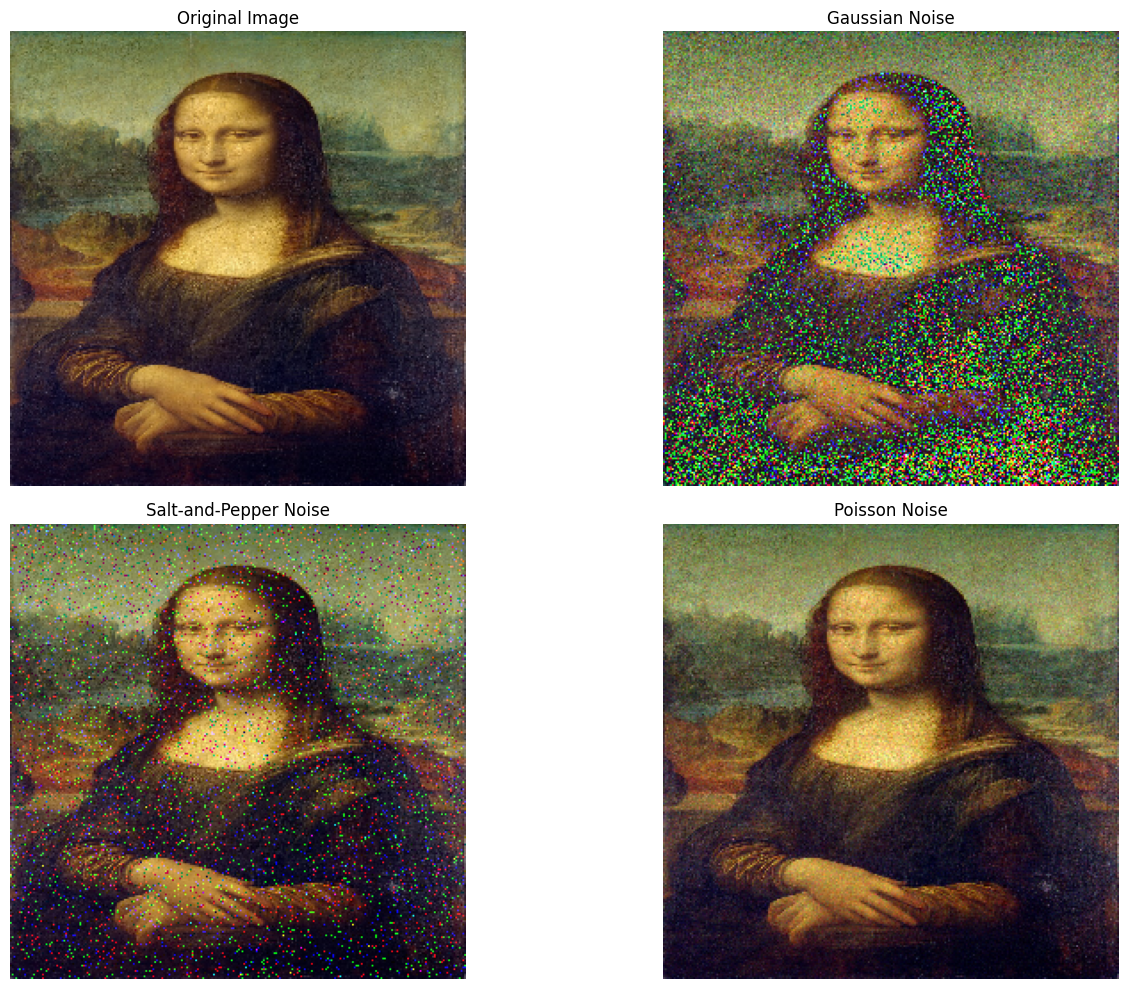

In [1]:


# --------------------------
# 1. Synthetic Data Generation
# --------------------------

def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise to an image."""
    noisy = image + np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    return np.clip(noisy, 0, 255)

def add_salt_pepper_noise(image, prob=0.05):
    """Add salt-and-pepper noise to an image."""
    return (random_noise(image, mode='s&p', amount=prob) * 255).astype(np.uint8)

def add_poisson_noise(image):
    """Add Poisson noise to an image."""
    return (random_noise(image, mode='poisson') * 255).astype(np.uint8)

# --------------------------
# 2. Preprocessing Pipeline
# --------------------------

def preprocess_image(image_path, target_size=(256, 256)):
    """Full preprocessing pipeline: load, resize, and add noise."""
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Failed to load image: {image_path}")

    # Resize to target size
    image = cv2.resize(image, target_size)

    # Apply synthetic noise
    noisy_gaussian = add_gaussian_noise(image)
    noisy_salt_pepper = add_salt_pepper_noise(image)
    noisy_poisson = add_poisson_noise(image)

    return {
        "original": image,
        "noisy_gaussian": noisy_gaussian,
        "noisy_salt_pepper": noisy_salt_pepper,
        "noisy_poisson": noisy_poisson
    }

# --------------------------
# 3. Visualization Function
# --------------------------

def display_images(images_dict):
    """Display the original and noisy images with titles."""
    plt.figure(figsize=(15, 10))

    # Plot original image
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(images_dict["original"], cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    # Plot noisy images
    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(images_dict["noisy_gaussian"], cv2.COLOR_BGR2RGB))
    plt.title("Gaussian Noise")
    plt.axis("off")

    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(images_dict["noisy_salt_pepper"], cv2.COLOR_BGR2RGB))
    plt.title("Salt-and-Pepper Noise")
    plt.axis("off")

    plt.subplot(2, 2, 4)
    plt.imshow(cv2.cvtColor(images_dict["noisy_poisson"], cv2.COLOR_BGR2RGB))
    plt.title("Poisson Noise")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# --------------------------
# Example Usage
# --------------------------

if __name__ == "__main__":
    # Path to your dataset
    image_path = "Mona_Lisa.jpg"  # Replace with the correct path if needed

    # Run preprocessing
    results = preprocess_image(image_path)

    # Display images
    display_images(results)